In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/home/wvdon/.conda/envs/pytorch/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_mu = pd.read_csv('data/final_rate.csv')

In [4]:
data_mu['parent'].value_counts()

B.1           455
B.1.1         409
B.1.617.2     129
B.1.177        85
BA.2           82
             ... 
B.3             1
AY.20           1
B.1.640         1
B.1.637         1
B.1.177.50      1
Name: parent, Length: 186, dtype: int64

In [8]:
data_mu['N_t'] = data_mu['N']*abs(data_mu['gap'])*2
data_mu['S_t'] = data_mu['S']*abs(data_mu['gap'])*2
data_mu['E_t'] = data_mu['E']*abs(data_mu['gap'])*2
data_mu['M_t'] = data_mu['M']*abs(data_mu['gap'])*2

In [66]:
sql_data = pd.read_csv('data/sql_database_final.csv')

In [14]:
gate_splider = pd.read_csv("data/findl_gap_lineage_splider.csv")[['Lineage','Earliest date','gap']]

In [17]:
final = pd.merge(data_mu,gate_splider,how='left',on='Lineage')

In [93]:
top20_Lineage = sql_data.sort_values('counts',ascending=False)['Lineage'][:2].to_list()

In [96]:
top20_Lineage

['BA.2', 'B.1.1.7']

In [101]:
final.head()

,Unnamed: 0,Lineage,parent,MIN(collection_date),parent_date,gap_x,N,M,S,E,N_t,S_t,E_t,M_t,Earliest date,gap_y
0,0,A.1,A,2020-02-21,2019-12-30,54,0.001417,0.001114,0.001835,0.001200,0.153045,0.198210,0.129581,0.120273,2020-02-22,54
1,1,A.11,A,2020-03-20,2019-12-30,81,0.001503,0.001018,0.001706,0.001054,0.243475,0.276323,0.170684,0.164881,2020-03-20,81
2,2,A.12,A,2020-04-10,2019-12-30,102,0.001059,0.000826,0.001380,0.000889,0.216130,0.281491,0.181445,0.168491,2020-04-10,102
3,3,A.15,A,2020-04-20,2019-12-30,112,0.000956,0.000753,0.001159,0.000757,0.214165,0.259511,0.169614,0.168725,2020-04-20,112
4,4,A.16,A,2020-02-15,2019-12-30,47,0.002194,0.001786,0.002754,0.001333,0.206271,0.258857,0.125342,0.167922,2020-02-15,47


In [103]:
final['Earliest date'] = pd.to_datetime(final['Earliest date'])
top = len(final)
Lineage = final['Lineage'][:top]
date = final['Earliest date'][:top]
day = 14
N = final['N_t'][:top]/abs(final['gap_y'][:top]//day)
E = final['E_t'][:top]/abs(final['gap_y'][:top]//day)
S = (final['S'][:top]*abs(final['gap_x'][:top]))/(abs(final['gap_x'][:top])//day)
M = final['M_t'][:top]/abs(final['gap_y'][:top]//day)

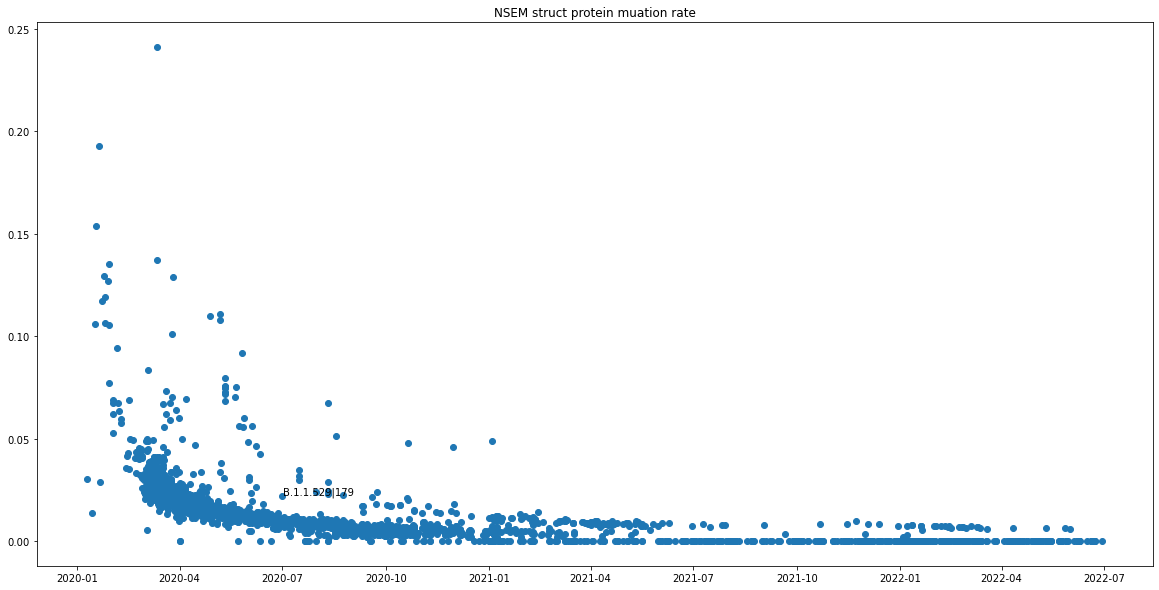

In [104]:
#fig = plt.figure(figsize=(20,10))

fig, ax = plt.subplots(figsize=(20,10))
#ax.scatter(date, S)
cut = 0.3
# for i in range(0,top):
#     #print(Lineage[i])
#     if N[i]>cut:
#         #print(N[i])
#         ax.annotate(Lineage[i], (date[i], N[i]), xytext=(1,1), textcoords='offset points')
#     plt.scatter(date, N, color='red',label='N')
#regressor = LinearRegression()
#regressor = regressor.fit(date,N)
ax.scatter(date, S)

for i in range(0,top):
    #print(Lineage[i])
    if str(Lineage[i])=='B.1.1.529': #in top20_Lineage:
        #print(N[i])
        ax.annotate(str(Lineage[i]+"|"+str(final['gap_y'][i])), (date[i], S[i]), xytext=(1,1.5), textcoords='offset points')
    #plt.scatter(date, S,label='S')
# for i in range(0,top):
#     #print(Lineage[i])
#     if N[i]>cut:
#         #print(N[i])
#         ax.annotate(Lineage[i], (date[i], E[i]), xytext=(1,2), textcoords='offset points')
#     plt.scatter(date, E,label='E')
# for i in range(0,top):
#     #print(Lineage[i])
#     if N[i]>cut:
#         #print(N[i])
#         ax.annotate(Lineage[i], (date[i], M[i]), xytext=(1,2.5), textcoords='offset points')
#     plt.scatter(date, M,label='M')
plt.title("NSEM struct protein muation rate")
plt.show()

In [118]:
vc

2020-03-15    21
2020-03-16    21
2020-03-13    21
2020-03-12    20
2020-03-17    20
              ..
2020-06-26     1
2020-09-26     1
2020-08-09     1
2020-07-11     1
2022-02-14     1
Name: Earliest date, Length: 615, dtype: int64

In [122]:
vc = final['Earliest date'].value_counts().sort_index()

In [124]:
#vc

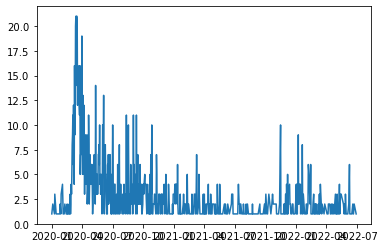

In [131]:
vc = final['Earliest date'].value_counts().sort_index()
pd_vc = pd.DataFrame([],columns=['date','counts'])
pd_vc['date'] = pd.to_datetime(vc.index)
pd_vc['counts'] = vc.values
plt.plot(pd_vc['date'],pd_vc['counts'])

In [128]:
#pd_vc

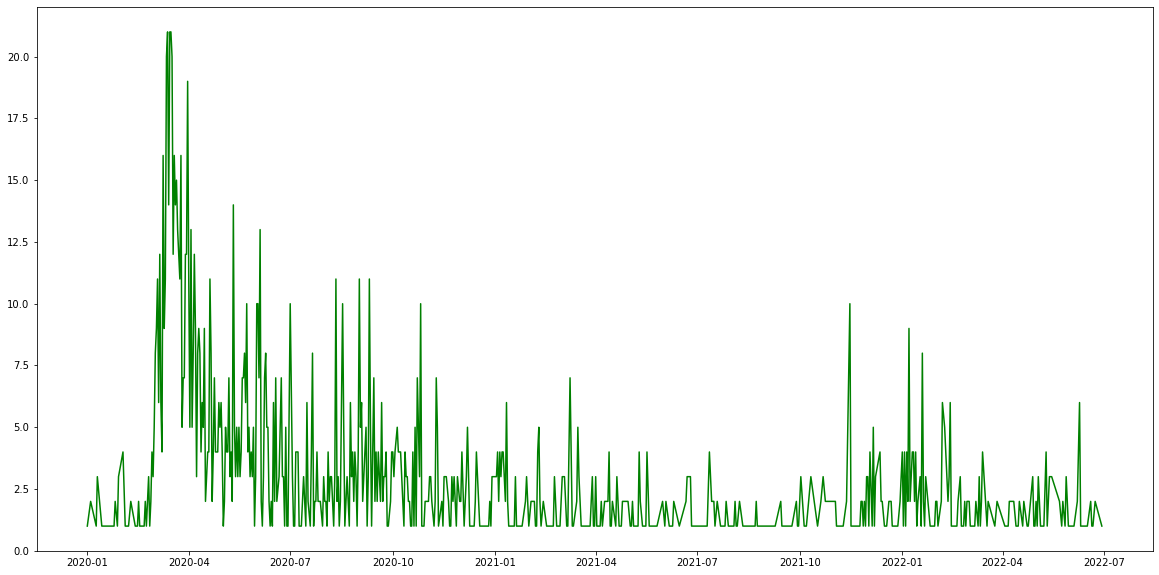

In [130]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(pd_vc['date'],pd_vc['counts'],label='Dead Rate True',color='green')

In [14]:
df_corr = data_mu[['N','M','S','E']]

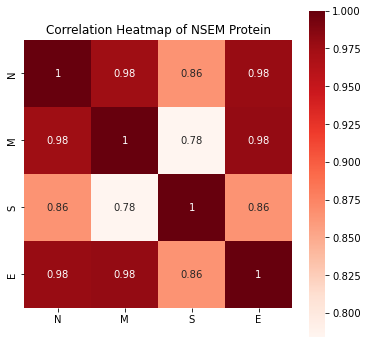

In [18]:
#df_coor = df.corr()
#print(df_coor)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 6),facecolor='w')
# 指定颜色带的色系
sns.heatmap(df_corr.corr(),annot=True, vmax=1, square=True, cmap="Reds", fmt='.2g')
plt.title('Correlation Heatmap of NSEM Protein')
plt.savefig('fig2.jpg',dpi=200)
plt.show()